In [40]:
from IPython.display import display, Math

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
# from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["errorbar.capsize"] = 2
plt.rcParams["savefig.dpi"] = 200
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.02
plt.rcParams["savefig.format"] = "pdf"

from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import uarray
from uncertainties.unumpy import nominal_values as unominal
from uncertainties.unumpy import std_devs as ustdev

def ufloat_to_latex(uf, filename, var=None, dim=None, folder='tables'):
    res = ''
    if var is not None:
        res += var + '='
    res += f"{uf:L}"
    if dim is not None:
        res += ' \\ ' + dim
    with open(folder + '/' + filename, 'w') as f:
        print(res, file=f)
    display(Math(res))

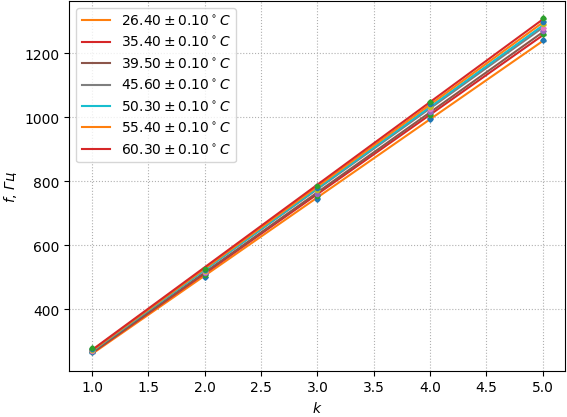

In [41]:
dfs = [pd.read_csv(f'data/{i}.csv') for i in range(1, 8)]
temperatures = uarray([26.4, 35.4, 39.5, 45.6, 50.3, 55.4, 60.3], 0.1)

plt.xlabel(r"$k$")
plt.ylabel(r"$f$, $Гц$")

coeffs = []
for df, t in zip(dfs, temperatures):
    x_data_unp = uarray(df["k"], 0)
    y_data_unp = uarray(df["f"], 1)

    x_data, x_err = unominal(x_data_unp), ustdev(x_data_unp)
    y_data, y_err = unominal(y_data_unp), ustdev(y_data_unp)

    plt.errorbar(x_data, y_data, xerr=x_err, yerr=y_err, fmt='.')

    func = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(func, x_data, y_data, sigma=y_err)
    perr = np.sqrt(np.diag(pcov))
    a = ufloat(popt[0], perr[0])
    # b = ufloat(popt[1], perr[1])
    coeffs.append(a)
    plt.plot(x_data, func(x_data, *popt), label=rf"${t:L}^\circ C$")

plt.legend()
plt.savefig(f"images/f")
plt.show()

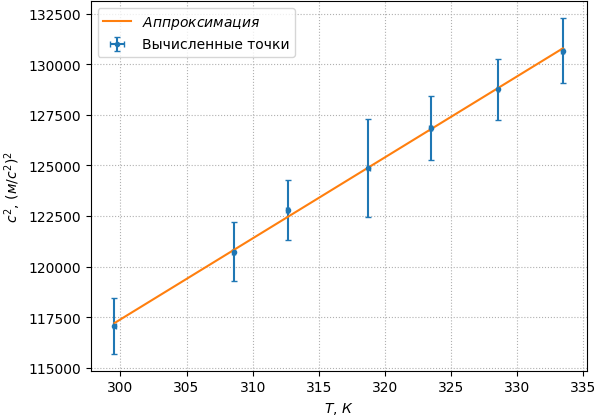

In [42]:
L = ufloat(700, 1) / 1e3
cs = [a * 2 * L for a in coeffs]

plt.xlabel(r"$T$, $К$")
plt.ylabel(r"$c^2$, $(м/с^2)^2$")

x_data_unp = temperatures + 273.15
y_data_unp = np.array(cs) ** 2

x_data, x_err = unominal(x_data_unp), ustdev(x_data_unp)
y_data, y_err = unominal(y_data_unp), ustdev(y_data_unp)

plt.errorbar(x_data, y_data, xerr=x_err, yerr=y_err, fmt='.', label="Вычисленные точки")

func = lambda x, a, b: a * x + b
popt, pcov = curve_fit(func, x_data, y_data, sigma=y_err)
perr = np.sqrt(np.diag(pcov))
a = ufloat(popt[0], perr[0])
b = ufloat(popt[1], perr[1])
plt.plot(x_data, func(x_data, *popt), label="$Аппроксимация$")

plt.legend()
plt.savefig(f"images/c")
plt.show()

In [50]:
R = ufloat(83_144_626, 1) / 1e7
M = ufloat(28.97, 0.01) / 1e3
gamma = M / R * a
ufloat_to_latex(gamma, "gamma.tex", "\gamma")

<IPython.core.display.Math object>